In [10]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combine_df = pd.merge(ride_df, city_df, how="outer", on="city")
# Display the data table for preview
combine_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [11]:
#list out unique city types
combine_df.type.unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
# merge total fares, ride numbers, avg fares into city df
fare = combine_df.groupby('city')['fare'].sum()
ride_count = combine_df.groupby('city')['fare'].count()
avg_fare = fare / ride_count
city_merge = pd.merge(city_df, pd.DataFrame({'Total Fares':fare, 'Number of Rides':ride_count, 'Average Fares':avg_fare}).reset_index(), on='city')
city_merge.head()

,city,driver_count,type,Total Fares,Number of Rides,Average Fares
0,Richardfort,38,Urban,626.45,28,22.373214
1,Williamsstad,59,Urban,560.33,23,24.362174
2,Port Angela,67,Urban,452.90,19,23.836842
3,Rodneyfort,34,Urban,658.19,23,28.616957
4,West Robert,39,Urban,778.84,31,25.123871


## Bubble Plot of Ride Sharing Data

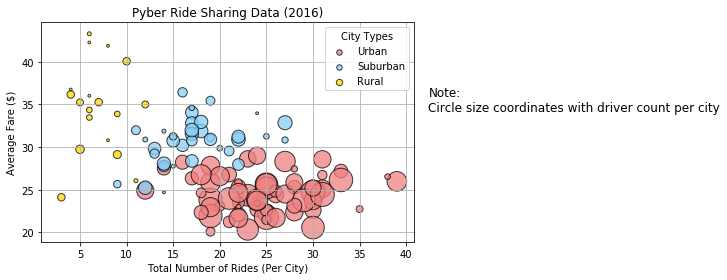

In [13]:
# Obtain the x and y coordinates for each of the three city types
urban = city_merge.loc[city_merge['type'] == 'Urban']
suburban = city_merge.loc[city_merge['type'] == 'Suburban']
rural = city_merge.loc[city_merge['type'] == 'Rural']

# Build the scatter plots for each city types
plt.scatter(urban['Number of Rides'], urban['Average Fares'], marker='o', facecolor='lightcoral', edgecolor='black', 
            s=urban['driver_count']*8, alpha=0.75, linewidth=1, label='Urban')
plt.scatter(suburban['Number of Rides'], suburban['Average Fares'], marker='o', facecolor='lightskyblue', edgecolor='black', 
            s=suburban['driver_count']*8, alpha=0.75, linewidth=1, label='Suburban')
plt.scatter(rural['Number of Rides'], rural['Average Fares'], marker='o', facecolor='gold', edgecolor='black', 
            s=rural['driver_count']*8, alpha=0.75, linewidth=1, label='Rural')

# Incorporate the other graph properties
plt.title('Pyber Ride Sharing Data (2016)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid()
plt.tight_layout()

# Create a legend
lgnd = plt.legend(title='City Types')
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(1, 0.6, 'Note:\nCircle size coordinates with driver count per city', fontsize=12, transform=plt.gcf().transFigure)

# Save Figure
plt.savefig("../Images/Pyber_bubble_chart.png")

## Total Fares by City Type

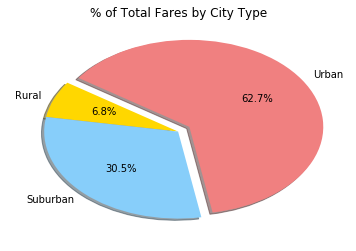

In [14]:
# Calculate Type Percents
# sum fares for each type and overall total
urban_total = urban['Total Fares'].sum()
suburban_total = suburban['Total Fares'].sum()
rural_total = rural['Total Fares'].sum()
total = urban_total + suburban_total + rural_total

#Percent fares by city type calc
urban_percent = urban_total / total
suburban_percent = suburban_total / total
rural_percent = rural_total / total

# Build Pie Chart
labels = ['Urban', 'Rural', 'Suburban']
sizes = [urban_percent, rural_percent, suburban_percent]
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title('% of Total Fares by City Type')

# Save Figure
plt.savefig("../Images/Pyber_pie_fares.png")

In [15]:
# Show Figure
plt.show()

## Total Rides by City Type

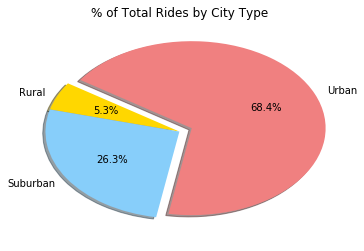

In [16]:
# Calculate Ride Percents
# sum rides for each type and overall total
urban_Rtotal = urban['Number of Rides'].sum()
suburban_Rtotal = suburban['Number of Rides'].sum()
rural_Rtotal = rural['Number of Rides'].sum()
Rtotal = urban_Rtotal + suburban_Rtotal + rural_Rtotal

#Percent fares by city type calc
urban_Rpercent = urban_Rtotal / Rtotal
suburban_Rpercent = suburban_Rtotal / Rtotal
rural_Rpercent = rural_Rtotal / Rtotal

# Build Pie Chart
labels = ['Urban', 'Rural', 'Suburban']
sizes = [urban_Rpercent, rural_Rpercent, suburban_Rpercent]
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title('% of Total Rides by City Type')

# Save Figure
plt.savefig("../Images/Pyber_pie_rides.png")

In [17]:
# Show Figure
plt.show()

## Total Drivers by City Type

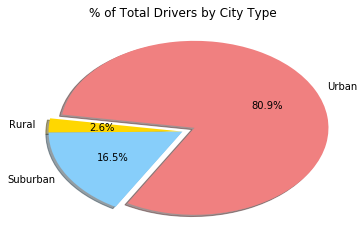

In [18]:
# Calculate Driver Percents
# sum drivers for each type and overall total
urban_Dtotal = urban['driver_count'].sum()
suburban_Dtotal = suburban['driver_count'].sum()
rural_Dtotal = rural['driver_count'].sum()
Dtotal = urban_Dtotal + suburban_Dtotal + rural_Dtotal

#Percent fares by city type calc
urban_Dpercent = urban_Dtotal / Dtotal
suburban_Dpercent = suburban_Dtotal / Dtotal
rural_Dpercent = rural_Dtotal / Dtotal

# Build Pie Chart
labels = ['Urban', 'Rural', 'Suburban']
sizes = [urban_Dpercent, rural_Dpercent, suburban_Dpercent]
colors = ['lightcoral', 'gold', 'lightskyblue']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title('% of Total Drivers by City Type')

# Save Figure
plt.savefig("../Images/Pyber_pie_drivers.png")

In [19]:
# Show Figure
plt.show()

In [20]:
# observed trends report
# 1 - Inverse relationship between total number of rides and average fare. 
# 2 - Urban cities had more rides and drivers with lower average fares
# 2 - Rural cities had fewer drivers and number of rides but higher average fares
# Possible explanation could be urban cities are denser with shorter drive distance whereas rural cities are larger in area